In [248]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [249]:
data = pd.read_csv('train.csv')

In [250]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
data.shape

(891, 12)

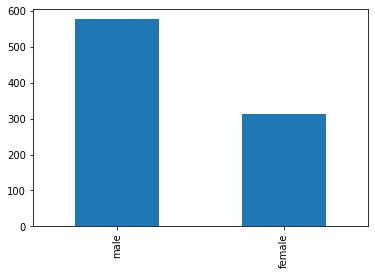

In [252]:
data['Sex'].value_counts().plot(kind='bar')

In [253]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

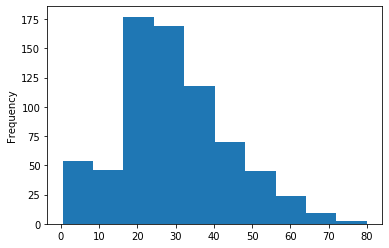

In [254]:
data['Age'].plot(kind='hist')

In [255]:
#Define children as < 18, filter out the adult women and men that survived
surv_wom = data[(data['Sex'] =='female') & (data['Age'] >18)][['Age','Survived']]
surv_man = data[(data['Sex'] =='male') & (data['Age'] >18)][['Age','Survived']]

In [256]:
#Survival is denoted by 1, Death is denoted by 0, summing the column will give us total survived, length of the full df will give us total
print("women survived:", sum(surv_wom['Survived']),"out of", len(data),"total passengers", "or",round(sum(surv_wom['Survived'])/len(data),4)*100,"%")
print("men survived:", sum(surv_man['Survived']),"out of", len(data),"total passengers", "or", round(sum(surv_man['Survived'])/len(data),4)*100,"%")

women survived: 151 out of 891 total passengers or 16.950000000000003 %
men survived: 69 out of 891 total passengers or 7.739999999999999 %


In [258]:
#Now the children
tot_chil = data.loc[data.Age <18][['Sex','Age','Survived']]
print("children survived:",sum(tot_chil['Survived']),"out of", len(data),"total passengers", "or",round(sum(tot_chil['Survived'])/len(data),4)*100,"%")

children survived: 61 out of 891 total passengers or 6.8500000000000005 %


In [268]:
wom_chil = sum(surv_wom['Survived'])+sum(tot_chil['Survived'])
print("women and children saved:",wom_chil,"out of",sum(data['Survived']),"total saved passengers or",round(wom_chil/sum(data['Survived']),4)*100,"%")

women and children saved: 212 out of 342 total saved passengers or 61.99 %
